# Analyzing Students' Mental Health in SQL## By: Hrishikesh Dipak DesaiIn this project, we'll perform exploratory data analysis on a dataset around mental health of domestic and international students. We'll perform SQL querying to look at how social connectedness and cultural issues affect mental health. Finally, we'll visualize the results of the analysis using the Python Plotly package.

## The Data

This survey was conducted in 2018 at an international Japanese university and the associated study was published in 2019. It was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties compared to the general population, and that social connectedness and acculturative stress are predictive of depression.

Social connectedness: measure of belonging to a social group or network.

Acculturative stress: stress associated with learning about and intergrating into a new culture.

[See paper for more info, including data description.](https://www.mdpi.com/2306-5729/4/3/124/htm)

[Link to the data.](https://www.mdpi.com/2306-5729/4/3/124/s1)

### Inspect the Data

Our data is in one table that includes all of the survey data. There are 50 fields and, according to the paper, 268 records. Each row is a student.

1. Check if the data has 268 records.

In [1]:
-- Count the number of records in the table
SELECT COUNT(*) AS total_records
FROM students;

,total_records
0,286


2. Inspect the dataset to see what the fields look like.

In [2]:
-- Inspect the dataset and limit the output to 5 records
SELECT *
FROM students
LIMIT 5;

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No


3. How many international and domestic students are in the data set?

In [3]:
-- Count the number of international and domestic students
SELECT inter_dom, COUNT(inter_dom) AS count_inter_dom
FROM students
GROUP BY inter_dom;

,inter_dom,count_inter_dom
0,Dom,67
1,,18
2,Inter,201


4. Look into the 18 unassigned rows to understand what they could be.

In [4]:
-- Query the dataset to see all records where inter_dom is neither 'Dom' nor 'Inter'
SELECT *
FROM students
WHERE inter_dom NOT LIKE 'D%' AND inter_dom NOT LIKE 'I%';

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.0,137.0,66.0,61.0,30.0,46.0,19.0,65.0,21.0,45.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140.0,131.0,202.0,207.0,238.0,222.0,249.0,203.0,247.0,223.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128.0,137.0,66.0,61.0,30.0,46.0,19.0,65.0,21.0,45.0


5. Where are the international students from?

In [5]:
-- See what Region international students are from
SELECT "Region", COUNT(inter_dom) AS count_inter_dom
FROM students
WHERE inter_dom = 'Inter'
GROUP BY "Region";

,Region,count_inter_dom
0,SA,18
1,EA,48
2,JAP,2
3,Others,11
4,SEA,122


### Understanding the scores

6. Find the minimum, maximum, and average of each of the diagnostic tests (PHQ-9, SCS, ASISS). This information is in the paper, but it's good practice to look this up yourself during analysis.

In [6]:
-- Find out the basic summary statistics of the diagnostic tests for all students
SELECT MIN("ToDep") AS min_phq, 
	   MAX("ToDep") AS max_phq, 
       ROUND(AVG("ToDep"), 2) AS avg_phq, 
       MIN("ToSC") AS min_scs, 
       MAX("ToSC") AS max_scs, 
       ROUND(AVG("ToSC"), 2) AS avg_scs, 
       MIN("ToAS") AS min_as, 
       MAX("ToAS") AS max_as, 
       ROUND(AVG("ToAS"), 2) AS avg_as
FROM students;

,min_phc,max_phc,avg_phc,min_scs,max_scs,avg_scs,min_as,max_as,avg_as
0,0,25,8.19,8,48,37.47,36,145,72.38


7. What are the summary statistics for domestic students and international students?

In [9]:
-- Write a query that looks at the statistics of each student group on one table, remembering to avoid the empty rows
SELECT inter_dom,
	   MIN("ToDep") AS min_phq, 
	   MAX("ToDep") AS max_phq, 
       ROUND(AVG("ToDep"), 2) AS avg_phq, 
       MIN("ToSC") AS min_scs, 
       MAX("ToSC") AS max_scs, 
       ROUND(AVG("ToSC"), 2) AS avg_scs, 
       MIN("ToAS") AS min_as, 
       MAX("ToAS") AS max_as, 
       ROUND(AVG("ToAS"), 2) AS avg_as
FROM students
WHERE inter_dom IN ('Inter', 'Dom')
GROUP BY inter_dom;

,inter_dom,min_phc,max_phc,avg_phc,min_scs,max_scs,avg_scs,min_as,max_as,avg_as
0,Inter,0,25,8.04,11,48,37.42,36,145,75.56
1,Dom,0,23,8.61,8,48,37.64,36,112,62.84


### International Focus

The study found that international students presented a higher risk of having mental health difficulties. Recall, the data is also skewed towards international students. Let's take a closer look at this student group.

8. How does the age of the international student impact the scores?

In [10]:
-- Find the average scores for each age group of international students, and view them in order
SELECT "Age", 
       ROUND(AVG("ToDep"), 2) AS avg_phq, 
       ROUND(AVG("ToSC"), 2) AS avg_scs, 
       ROUND(AVG("ToAS"), 2) AS avg_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY "Age"
ORDER BY "Age";

,Age,avg_phc,avg_scs,avg_as
0,17,4.67,37.33,70.67
1,18,8.75,34.11,80.61
2,19,8.44,37.90,74.10
3,20,7.35,38.21,73.26
4,21,9.23,37.74,75.23
5,22,8.36,38.14,70.43
6,23,9.67,32.00,81.25
7,24,4.67,42.33,74.33
8,25,6.11,37.33,80.78
9,27,10.00,35.00,42.00


9. See how another variable may impact the score.

Solution using Length of Stay

In [11]:
-- Find the average scores by length of stay for international students, and view them in order
SELECT "Stay", 
       ROUND(AVG("ToDep"), 2) AS avg_phq, 
       ROUND(AVG("ToSC"), 2) AS avg_scs, 
       ROUND(AVG("ToAS"), 2) AS avg_as
FROM students
WHERE inter_dom = 'Inter'
GROUP BY "Stay"
ORDER BY "Stay";

,Stay,avg_phc,avg_scs,avg_as
0,1,7.48,38.11,72.80
1,2,8.28,37.08,77.67
2,3,9.09,37.13,78.00
3,4,8.57,33.93,87.71
4,5,0.00,34.00,91.00
5,6,6.00,38.00,58.67
6,7,4.00,48.00,45.00
7,8,10.00,44.00,65.00
8,10,13.00,32.00,50.00


# Interactive plots with Plotly

In [26]:
# Import plotly packages
import plotly.express as px
import plotly.graph_objects as go

In [23]:
-- Make sure the dataset you want is saved to a variable
SELECT *
FROM students;

,inter_dom,Region,Gender,Academic,Age,Age_cate,Stay,Stay_Cate,Japanese,Japanese_cate,...,Friends_bi,Parents_bi,Relative_bi,Professional_bi,Phone_bi,Doctor_bi,religion_bi,Alone_bi,Others_bi,Internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,,,,,NaN,NaN,NaN,,NaN,,...,140,,,,,,,,,
282,,,,,NaN,NaN,NaN,,NaN,,...,131,,,,,,,,,
283,,,,,NaN,NaN,NaN,,NaN,,...,202,,,,,,,,,
284,,,,,NaN,NaN,NaN,,NaN,,...,207,,,,,,,,,


### Histograms

In [90]:
# Create the histogram figure
fig = px.histogram(
    
# Select the dataframe
    data_frame=dataset, 

# Select the column you want to visualize
    x="ToDep",

# Select the additional column to determine different groups of data
    color="inter_dom",

# Clean up the labels
    title="Distribution of the total scores from the PHQ-9 test_data",
    labels={"inter_dom":"Type of Student", "ToDep":"Total PHQ-9 Scores"})

# Show the figure
fig.show()

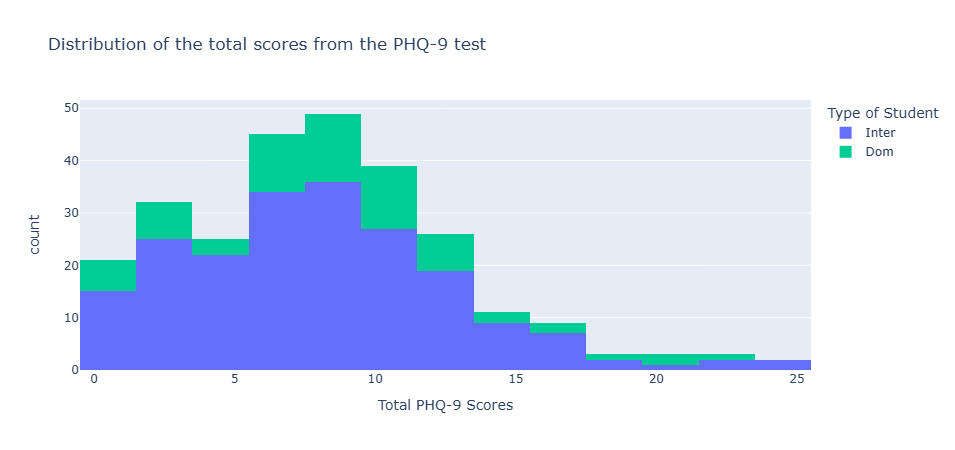

### Box Plots

In [91]:
# Create the box plot figure
fig = px.box(

# Select the dataframe
    data_frame=dataset, 

# Select the column you want to visualize
    x="ToDep", 
    
# Select the additional column to determine different groups of data    
    color="inter_dom", 

# Select the additional column to determine what information is shown when you hover over the plot
    hover_data=["Age"],

# Select the option to view all data points
    points="all",

# Clean up the labels
    title="Box plot of the total scores from the PHQ-9 test_data",
    labels={"inter_dom":"Type of Student", "ToDep":"Total PHQ-9 Scores"})

# Show the figure
fig.show()

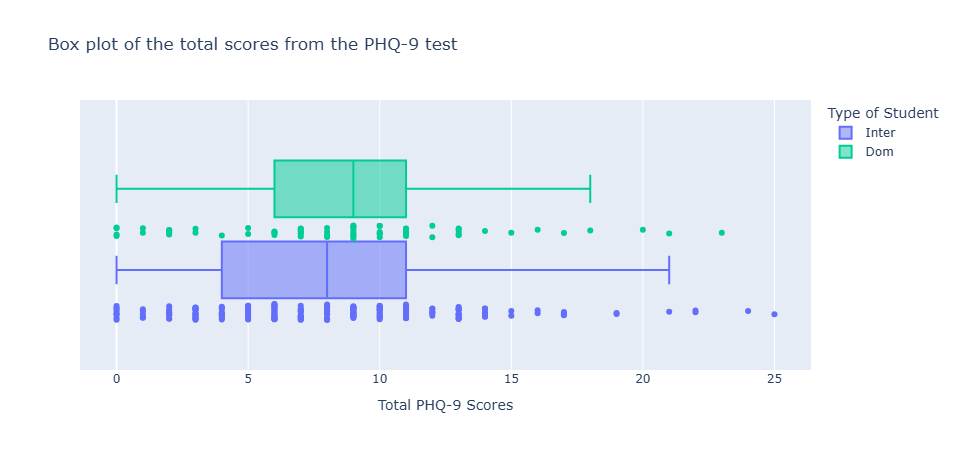

### Correlation Plot

In [89]:
# List the columns that are continuous variablescontinuous_variables = ['Age', 'Stay', 'Japanese', 'English', 'ToDep', 'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell', 'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess', 'Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet']# Create a subset dataframe only the columns of the continous variablesdata_cont = dataset[continuous_variables]# Create a pearson correlationdata_corr = data_cont.corr(method='pearson')# Build the Heatmapfig = go.Figure(go.Heatmap(x=data_corr.columns, y=data_corr.columns, z=data_corr.values.tolist(),                          zmin=-1, zmax=1))# Adjust the plot sizefig.update_layout(width=900, height=900)# Show the plotfig.show()

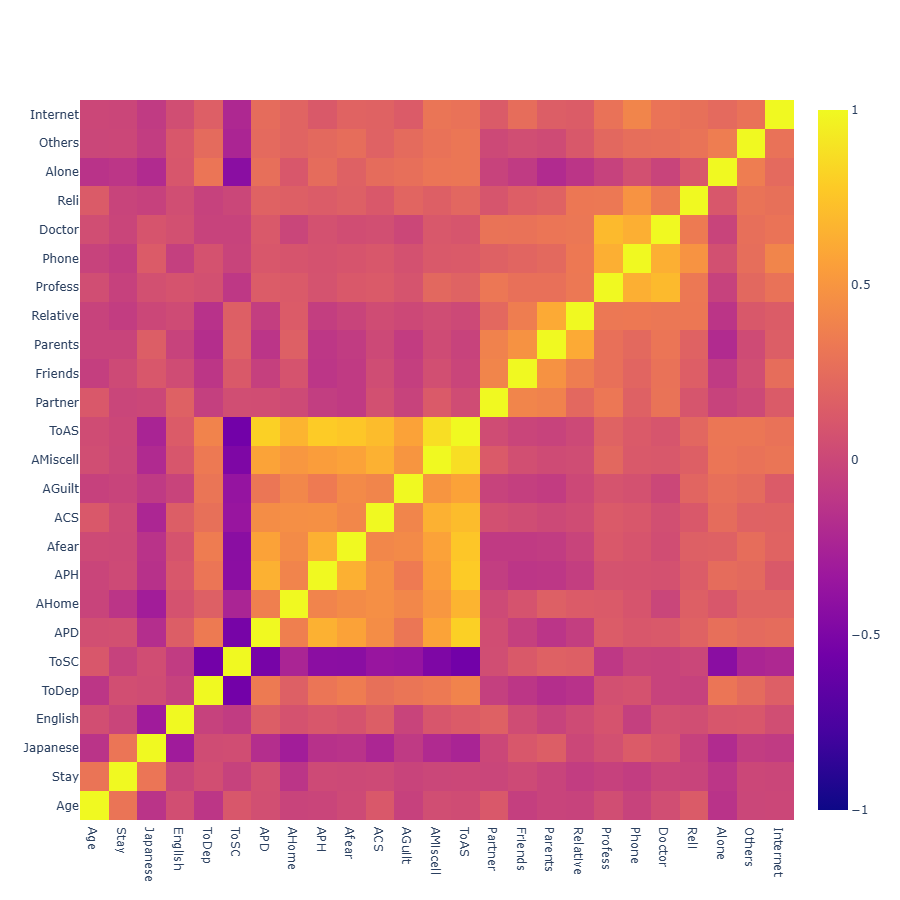

### Dropdown Interactivity

In [75]:
# Create the figure
fig = go.Figure()

# Write a for loop to loop over the variable you want to have in the drop down
for stu_type in ['Inter', 'Dom']:
    dataframe = dataset[dataset.inter_dom == stu_type]
    fig.add_trace(go.Histogram(x=dataframe["ToDep"], name=stu_type))

# Create the dropdown buttons
dropdown_buttons = [
    {'label':'All', 'method':'update', 'args':[{'visible': [True, True]}, {'title': 'All'}]},
    {'label':'International', 'method':'update', 'args':[{'visible': [True, False]}, {'title': 'International'}]},
    {'label':'Domestic', 'method':'update', 'args':[{'visible':[False, True]}, {'title':'Domestic'}]}
]

# Add the dropdown to the figure
fig.update_layout(
    {'updatemenus':[{'type':"dropdown",
         'x': 1.3,
         'target': 0.5,
         'showactive':True,
         'active':0,
         'buttons': dropdown_buttons}]
    }
)

# Show the figure
fig.show()

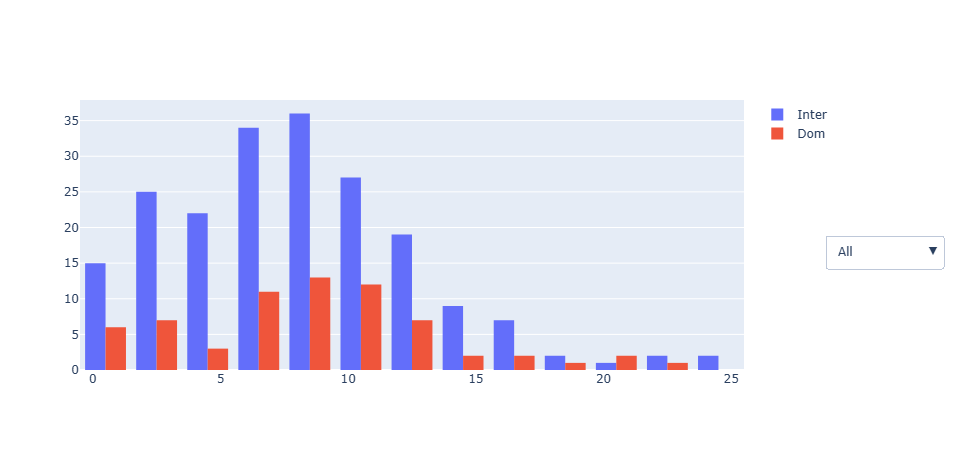